In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Phishing_Legitimate_full.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [5]:
data.isna().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


##### -> No Missing value

In [6]:
data.shape

(10000, 50)

#### Check Class Distribution

In [7]:
data["CLASS_LABEL"].value_counts()

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

/tmp/ipykernel_6242/3984724323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["CLASS_LABEL"],palette="coolwarm")


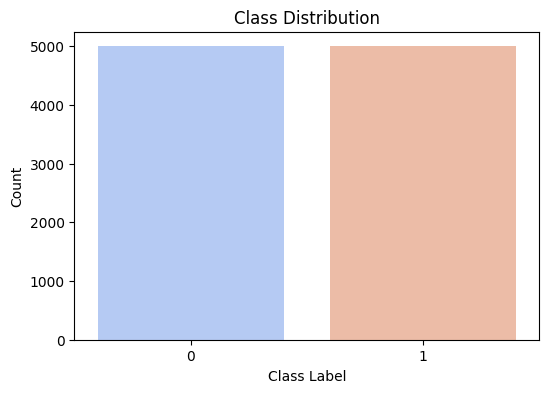

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=data["CLASS_LABEL"],palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

##### -> Equal Diatribution

### Feature Distribution

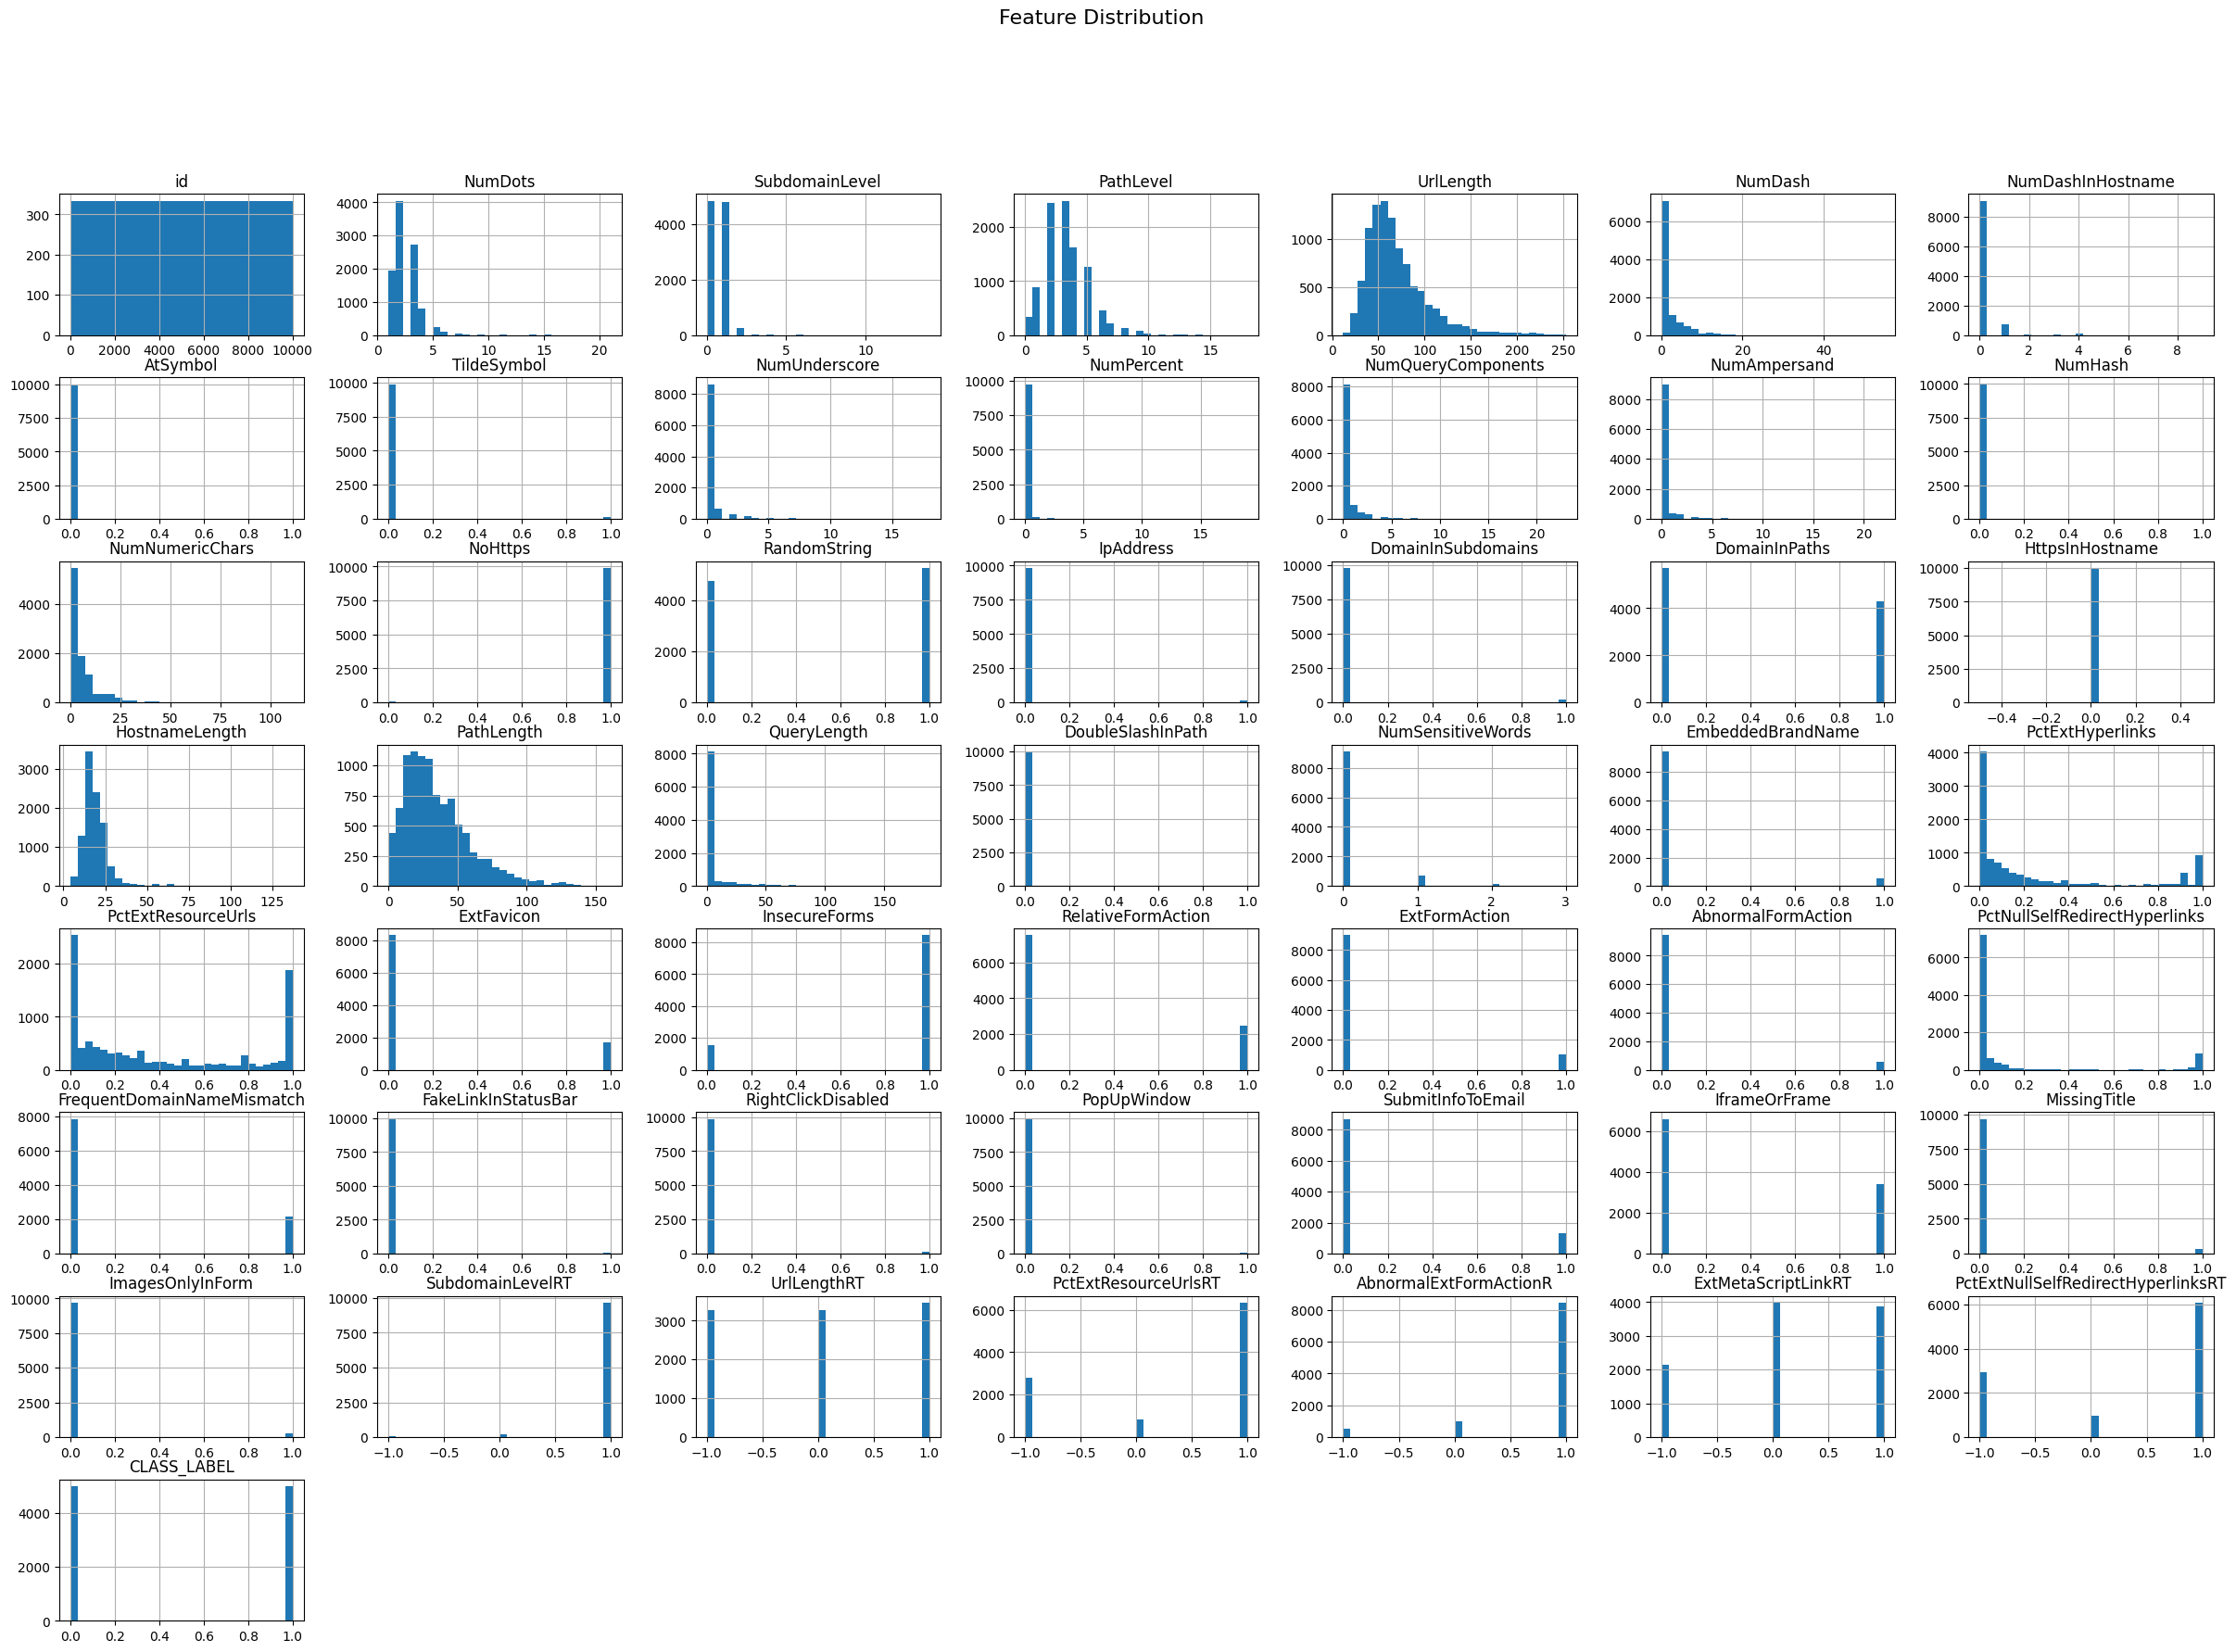

In [9]:
data.hist(figsize=(30,20),bins=30)
plt.suptitle("Feature Distribution",fontsize=16)
plt.show()

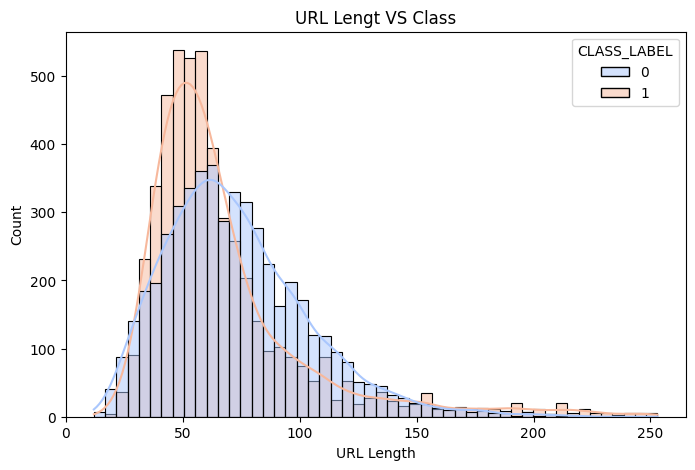

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data,x="UrlLength" , hue="CLASS_LABEL",bins=50,kde=True,palette="coolwarm")
plt.title("URL Lengt VS Class")
plt.xlabel("URL Length")
plt.ylabel("Count")
plt.show()

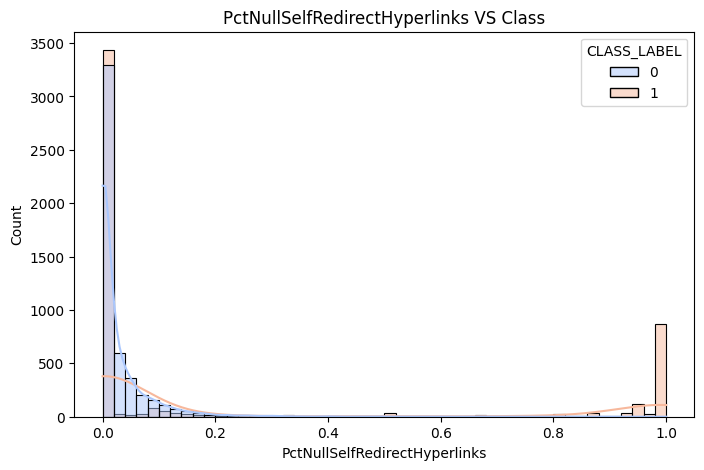

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data,x="PctNullSelfRedirectHyperlinks" , hue="CLASS_LABEL",bins=50,kde=True,palette="coolwarm")
plt.title("PctNullSelfRedirectHyperlinks VS Class")
plt.xlabel("PctNullSelfRedirectHyperlinks")
plt.ylabel("Count")
plt.show()

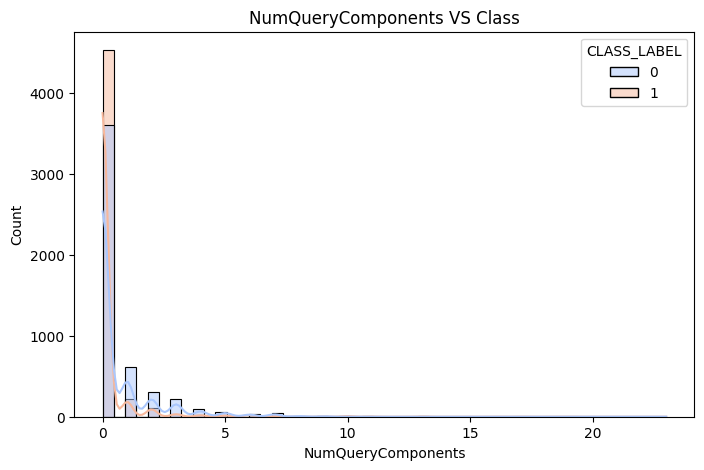

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data,x="NumQueryComponents" , hue="CLASS_LABEL",bins=50,kde=True,palette="coolwarm")
plt.title("NumQueryComponents VS Class")
plt.xlabel("NumQueryComponents")
plt.ylabel("Count")
plt.show()

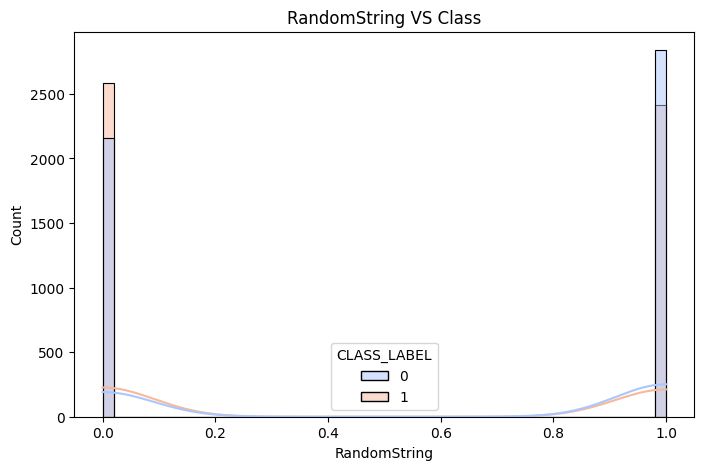

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data,x="RandomString" , hue="CLASS_LABEL",bins=50,kde=True,palette="coolwarm")
plt.title("RandomString VS Class")
plt.xlabel("RandomString")
plt.ylabel("Count")
plt.show()

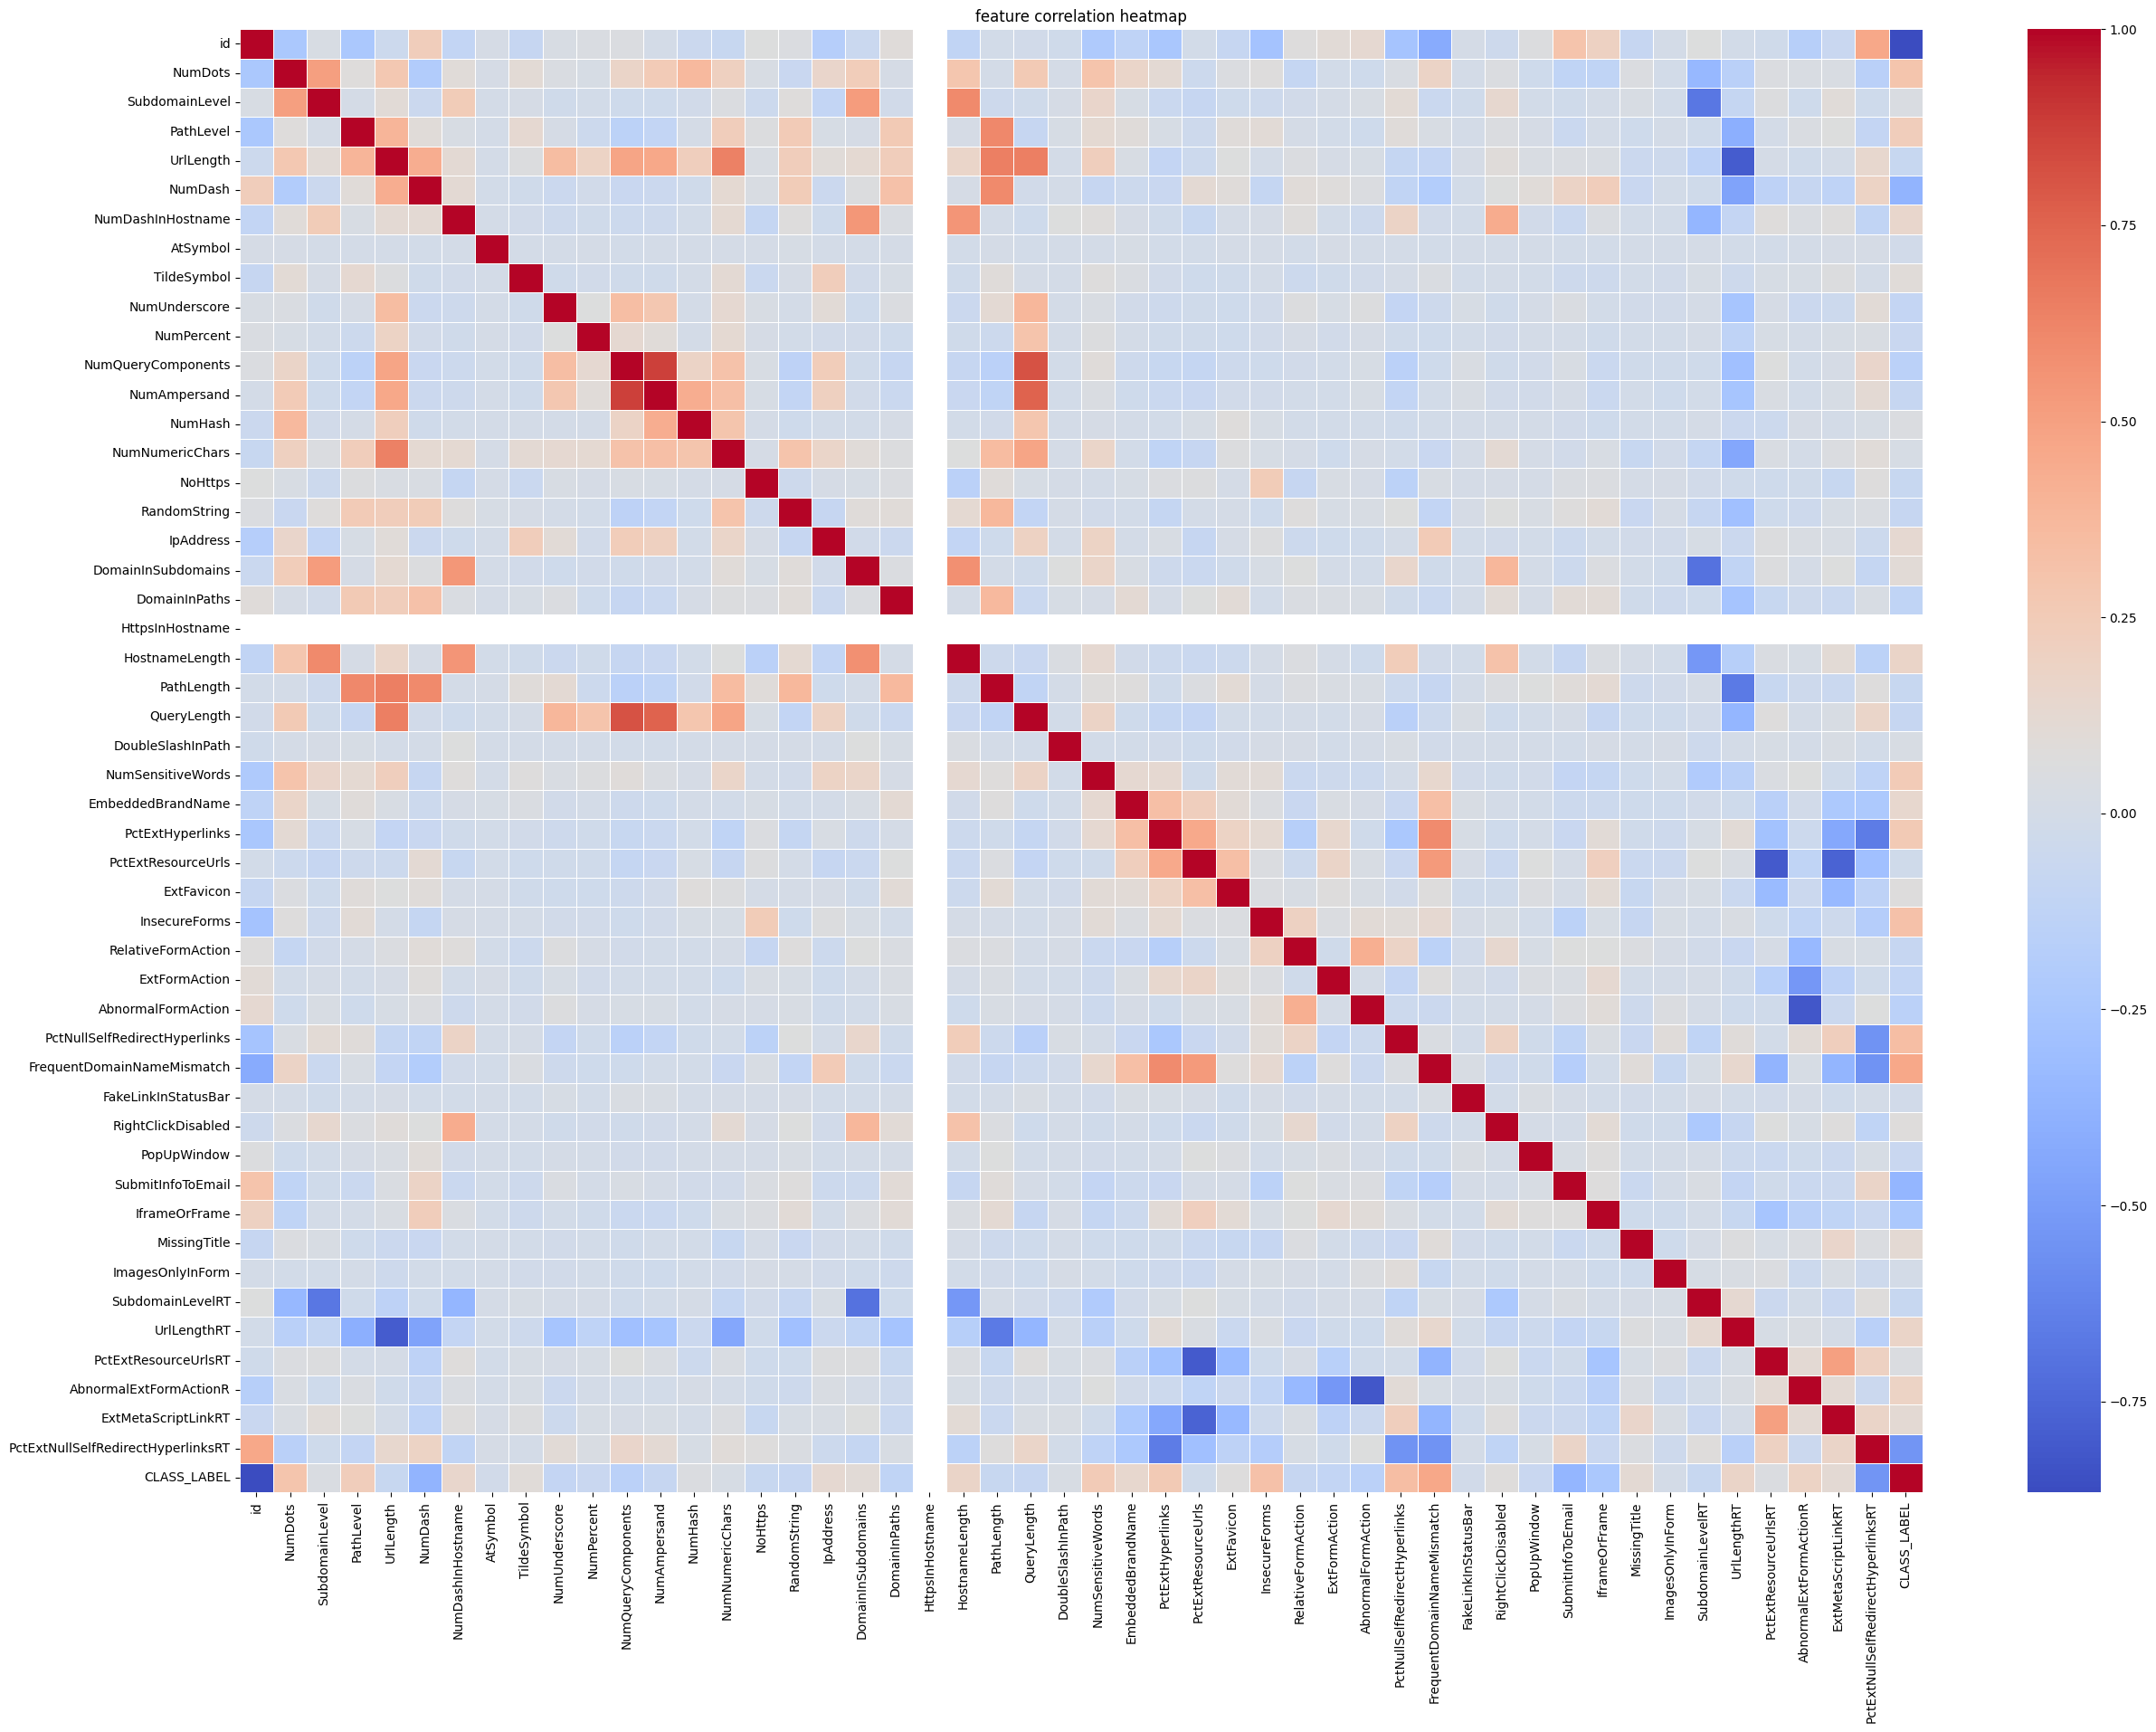

In [14]:
plt.figure(figsize=(30,21))
sns.heatmap(data.corr(),annot=False,cmap="coolwarm",linewidth=0.5)
plt.title("feature correlation heatmap")
plt.show()

In [15]:
corr_matrix=data.corr().abs()
high_corr_pairs=np.where(corr_matrix>0.5)
high_corr_pairs=[(data.columns[x],data.columns[y],corr_matrix.iloc[x,y])
                 for x,y in zip(*high_corr_pairs) if x != y and x<y]
high_corr_data=pd.DataFrame(high_corr_pairs,columns=["Feature 1","Feature 2","correlation"])
high_corr_data

,Feature 1,Feature 2,correlation
0,id,CLASS_LABEL,0.866025
1,NumDots,SubdomainLevel,0.507992
2,SubdomainLevel,DomainInSubdomains,0.522014
3,SubdomainLevel,HostnameLength,0.605218
4,SubdomainLevel,SubdomainLevelRT,0.679687
5,PathLevel,PathLength,0.612786
6,UrlLength,NumNumericChars,0.637872
7,UrlLength,PathLength,0.643924
8,UrlLength,QueryLength,0.649204
9,UrlLength,UrlLengthRT,0.800096


In [16]:
df=data.drop(columns=['id'])
feature_to_drop=[
    'NumQueryComponents',
    'AbnormalFormAction',
    'PctExtResourceUrlsRT',
    'UrlLengthRT',
    'QueryLength'
    ]

df=df.drop(columns=feature_to_drop)
df.shape
    

(10000, 44)

In [17]:
corr_matrix2=df.corr().abs()
high_corr_pairs2=np.where(corr_matrix2>0.7)
high_corr_pairs2=[(df.columns[x],df.columns[y],corr_matrix2.iloc[x,y])
                 for x,y in zip(*high_corr_pairs2) if x != y and x<y]
high_corr_data2=pd.DataFrame(high_corr_pairs2,columns=["Feature 1","Feature 2","correlation"])
high_corr_data2

,Feature 1,Feature 2,correlation
0,DomainInSubdomains,SubdomainLevelRT,0.704292
1,PctExtResourceUrls,ExtMetaScriptLinkRT,0.765659


In [18]:
from sklearn.ensemble  import RandomForestClassifier

X=df.drop(columns=['CLASS_LABEL'])
y=df['CLASS_LABEL']

rf=RandomForestClassifier(random_state=42)
rf.fit(X,y)

importances=pd.Series(rf.feature_importances_,index=X.columns)
importances

NumDots                               0.021568
SubdomainLevel                        0.005289
PathLevel                             0.029559
UrlLength                             0.018706
NumDash                               0.048965
NumDashInHostname                     0.006624
AtSymbol                              0.000120
TildeSymbol                           0.000657
NumUnderscore                         0.006877
NumPercent                            0.002853
NumAmpersand                          0.010620
NumHash                               0.000159
NumNumericChars                       0.042898
NoHttps                               0.002669
RandomString                          0.003156
IpAddress                             0.003276
DomainInSubdomains                    0.002277
DomainInPaths                         0.002929
HttpsInHostname                       0.000000
HostnameLength                        0.014060
PathLength                            0.020259
DoubleSlashIn

1️⃣ DomainInSubdomains (0.002277) & SubdomainLevelRT (0.002064)

Both have very low importance → Drop at least one (preferably the lowest).

Since both are not significant, you can drop both without major impact.

2️⃣ PctExtResourceUrls (0.098900) & ExtMetaScriptLinkRT (0.037700)

PctExtResourceUrls is more important than ExtMetaScriptLinkRT.

Keep PctExtResourceUrls, drop ExtMetaScriptLinkRT.

In [19]:
df=df.drop(columns=['DomainInSubdomains','SubdomainLevelRT','ExtMetaScriptLinkRT'])

In [20]:
df=df.drop(columns=['HttpsInHostname','FakeLinkInStatusBar'])

In [21]:
df.shape

(10000, 39)

In [22]:
df.describe().T[['min','max']]

,min,max
NumDots,1.0,21.0
SubdomainLevel,0.0,14.0
PathLevel,0.0,18.0
UrlLength,12.0,253.0
NumDash,0.0,55.0
NumDashInHostname,0.0,9.0
AtSymbol,0.0,1.0
TildeSymbol,0.0,1.0
NumUnderscore,0.0,18.0
NumPercent,0.0,19.0


Features with Large Ranges
📌 Why it matters? Large differences in feature scales can negatively impact ML models, especially distance-based models like KNN, SVM, or Neural Networks.

Examples:

UrlLength: 12 - 253

NumNumericChars: 0 - 111

PathLength: 0 - 161

NumDash: 0 - 55

➡ Normalization (MinMax Scaling) is recommended for these to bring them into a common scale.

In [23]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['UrlLength','NumNumericChars','PathLength','NumDash','NumDots','SubdomainLevel','HostnameLength']
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

#### Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

X=df.drop(columns=['CLASS_LABEL'])
y=df['CLASS_LABEL']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model =LogisticRegression()
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9475
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.94      0.96      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [25]:
train_accuracy=accuracy_score(y_train,model.predict(X_train_scaled))
test_accuracy=accuracy_score(y_test,model.predict(X_test_scaled))
print("Train Accuracy:",train_accuracy)
print("Test Accuracy:",test_accuracy)

Train Accuracy: 0.9385
Test Accuracy: 0.9475


##### -> NOT Overfit

In [26]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled,y_train)
y_pred_dt=dt_model.predict(X_test_scaled)
dt_accuracy=accuracy_score(y_test,y_pred_dt)

print("Decision Tree Accuracy:",dt_accuracy)
print(classification_report(y_test,y_pred_dt))


Decision Tree Accuracy: 0.9675
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1000
           1       0.97      0.96      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [27]:
train_accuracy_dt=dt_model.score(X_train_scaled,y_train)
print("train_accurcay(Decision Tree):",train_accuracy_dt)

train_accurcay(Decision Tree): 1.0


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled,y_train)
y_pred_rf=rf_model.predict(X_test_scaled)
rf_accuracy=accuracy_score(y_test,y_pred_rf)

print("Random Forest Accuracy:",rf_accuracy)
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy: 0.9865
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.99      0.98      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [29]:
train_accuracy_rf=rf_model.score(X_train_scaled,y_train)
print("train_accurcay(Random Forest):",train_accuracy_rf)

train_accurcay(Random Forest): 1.0


In [30]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)  # Use X_test_scaled, not X_train_scaled

# Evaluate model performance
rf_accuracy_modified = accuracy_score(y_test, y_pred_rf)

print("Modified Random Forest Accuracy:", rf_accuracy_modified)
print(classification_report(y_test, y_pred_rf))


Modified Random Forest Accuracy: 0.977
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.97      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [31]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators' : [50,100,200,300],
    'max_depth' : [5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

rf_tuned = RandomizedSearchCV (
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,n_iter=10,cv=5,scoring='accuracy',n_jobs=1,random_state=42
)

rf_tuned.fit(X_train_scaled,y_train)
print("Best Parameters:",rf_tuned.best_params_)

y_pred_rf_tuned=rf_tuned.best_estimator_.predict(X_test_scaled)
print('Tuned Random Forest Accuracy:', accuracy_score(y_test,y_pred_rf_tuned))



Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Tuned Random Forest Accuracy: 0.984


In [32]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the model
xgb_model = XGBClassifier(
    n_estimators=200,  # Corrected parameter name
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.988
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [34]:
train_accuracy_xgb=accuracy_score(y_train,xgb_model.predict(X_train_scaled))
test_accuracy_xgb=accuracy_score(y_test,y_pred_xgb)

print("Training Accuracy(XGBoost):",train_accuracy_xgb)
print("Test Accuracy(XGBoost):",test_accuracy_xgb)

Training Accuracy(XGBoost): 0.9985
Test Accuracy(XGBoost): 0.988


In [35]:
# Reducing Overfit


# Define XGBoost Model with Regularization
xgb_model = XGBClassifier(
    n_estimators=150,  # Fix typo
    max_depth=4,
    learning_rate=0.05,
    reg_lambda=1.0,  # Fix typo
    reg_alpha=0.5,
    random_state=42
)

# Train the model on X_train_scaled
xgb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy_xgb = accuracy_score(y_train, xgb_model.predict(X_train_scaled))
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Training Accuracy (XGBoost):", train_accuracy_xgb)
print("Test Accuracy (XGBoost):", test_accuracy_xgb)




Training Accuracy (XGBoost): 0.984625
Test Accuracy (XGBoost): 0.979


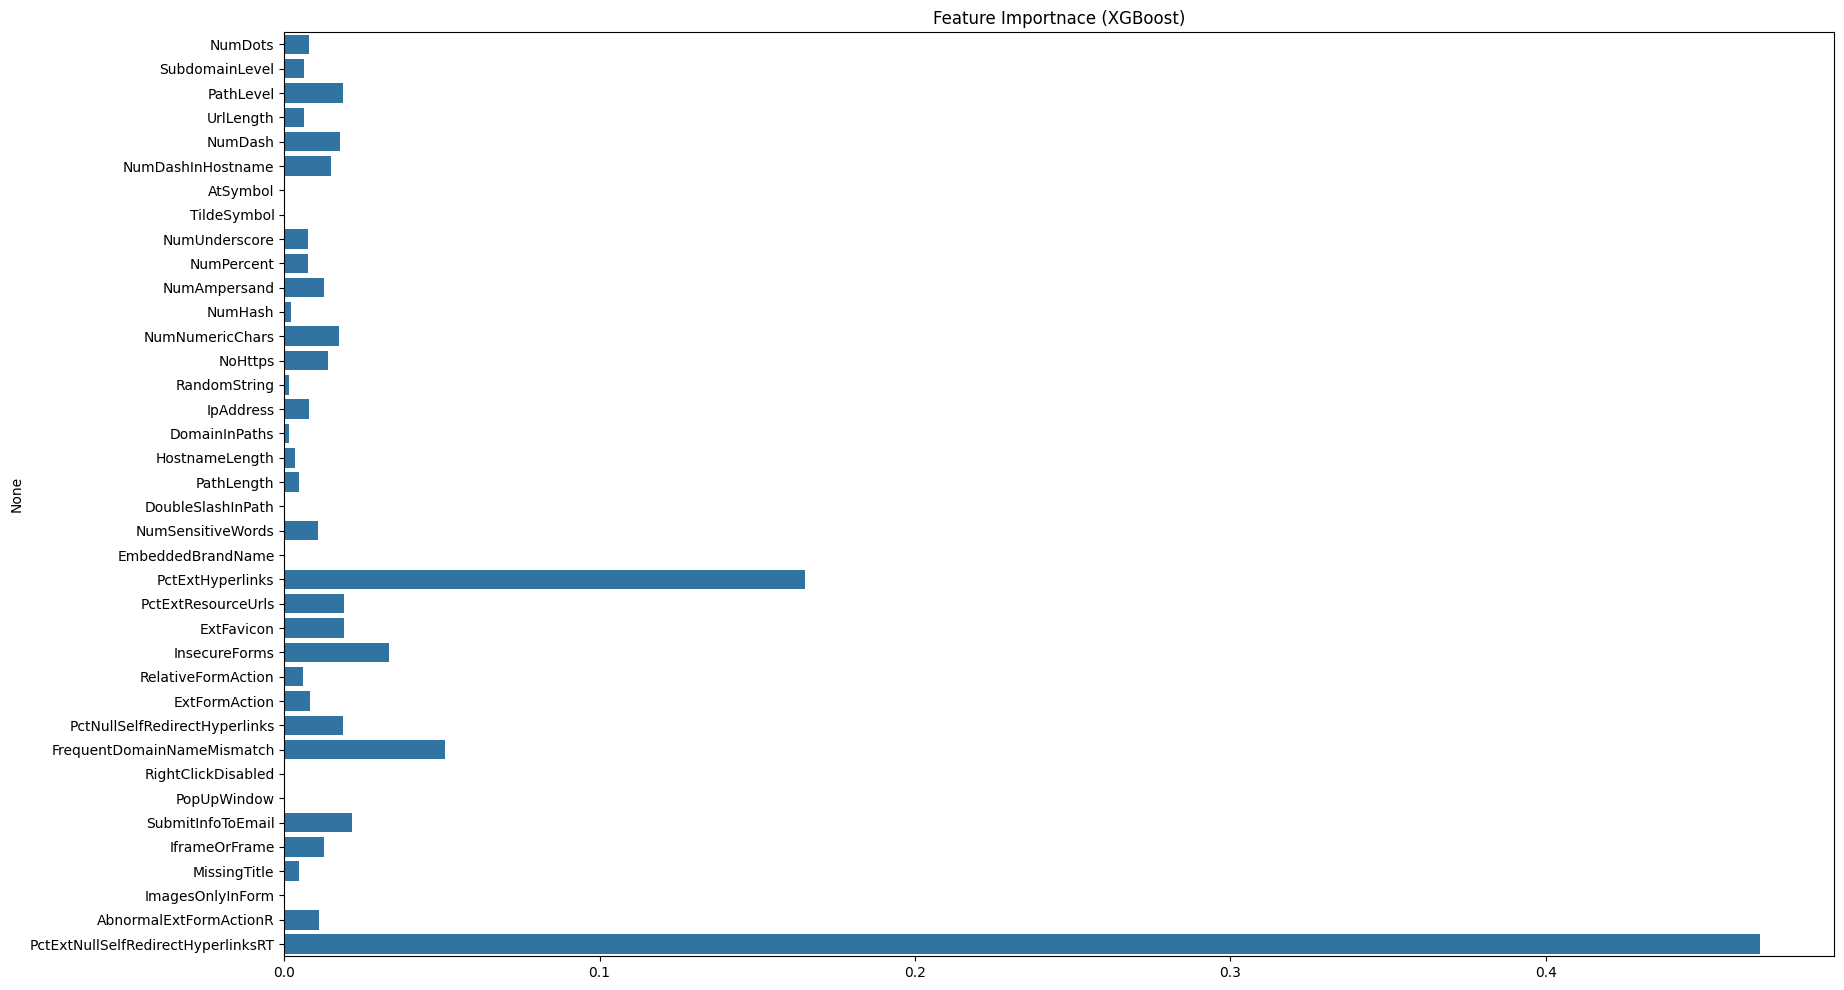

In [36]:
#Feature Importance

feature_importances=xgb_model.feature_importances_
feature_nmaes=X.columns
plt.figure(figsize=(20,12))
sns.barplot(x=feature_importances,y=feature_nmaes)
plt.title("Feature Importnace (XGBoost)")
plt.show()

In [37]:
import pandas as pd

# Get feature importance values
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features
print(importance_df)


                               Feature  Importance
37  PctExtNullSelfRedirectHyperlinksRT    0.468127
22                    PctExtHyperlinks    0.165000
29          FrequentDomainNameMismatch    0.051029
25                       InsecureForms    0.033092
32                   SubmitInfoToEmail    0.021513
23                  PctExtResourceUrls    0.019033
24                          ExtFavicon    0.018951
28       PctNullSelfRedirectHyperlinks    0.018673
2                            PathLevel    0.018559
4                              NumDash    0.017823
12                     NumNumericChars    0.017403
5                    NumDashInHostname    0.014922
13                             NoHttps    0.013744
10                        NumAmpersand    0.012639
33                       IframeOrFrame    0.012591
36              AbnormalExtFormActionR    0.011044
20                   NumSensitiveWords    0.010784
27                       ExtFormAction    0.008027
0                              

In [38]:
# Select top features based on importance
top_features = [
    'PctExtNullSelfRedirectHyperlinksRT', 'PctExtHyperlinks', 
    'FrequentDomainNameMismatch', 'InsecureForms', 'SubmitInfoToEmail',
    'PctExtResourceUrls', 'ExtFavicon', 'PctNullSelfRedirectHyperlinks',
    'PathLevel', 'NumDash', 'NumNumericChars', 'NumDashInHostname',
    'NoHttps', 'NumAmpersand', 'IframeOrFrame'
]

# Filter dataset with only selected features
X_train_selected = X_train_scaled[:, :len(top_features)]
X_test_selected = X_test_scaled[:, :len(top_features)]

# Train XGBoost again with selected features
xgb_model_selected = XGBClassifier(
    n_estimators=150, max_depth=4, learning_rate=0.05, 
    reg_lambda=1.0, reg_alpha=0.5, random_state=42
)
xgb_model_selected.fit(X_train_selected, y_train)

# Predictions
y_pred_xgb_selected = xgb_model_selected.predict(X_test_selected)

# Accuracy & Classification Report
train_acc_xgb_selected = accuracy_score(y_train, xgb_model_selected.predict(X_train_selected))
test_acc_xgb_selected = accuracy_score(y_test, y_pred_xgb_selected)

print("Training Accuracy (Reduced Features XGBoost):", train_acc_xgb_selected)
print("Test Accuracy (Reduced Features XGBoost):", test_acc_xgb_selected)
print(classification_report(y_test, y_pred_xgb_selected))


Training Accuracy (Reduced Features XGBoost): 0.887125
Test Accuracy (Reduced Features XGBoost): 0.885
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1000
           1       0.86      0.92      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.88      2000
weighted avg       0.89      0.89      0.88      2000



In [39]:
top_features = [
    'PctExtNullSelfRedirectHyperlinksRT', 'PctExtHyperlinks', 
    'FrequentDomainNameMismatch', 'InsecureForms', 'SubmitInfoToEmail',
    'PctExtResourceUrls', 'ExtFavicon', 'PctNullSelfRedirectHyperlinks',
    'PathLevel', 'NumDash', 'NumNumericChars', 'NumDashInHostname',
    'NoHttps', 'NumAmpersand', 'IframeOrFrame', 'AbnormalExtFormActionR',
    'NumSensitiveWords', 'ExtFormAction', 'NumDots'
]
# Select updated features
X_train_selected = X_train_scaled[:, :len(top_features)]
X_test_selected = X_test_scaled[:, :len(top_features)]

# Train XGBoost again
xgb_model_selected = XGBClassifier(
    n_estimators=150, max_depth=4, learning_rate=0.05, 
    reg_lambda=1.0, reg_alpha=0.5, random_state=42
)
xgb_model_selected.fit(X_train_selected, y_train)

# Predictions
y_pred_xgb_selected = xgb_model_selected.predict(X_test_selected)

# Accuracy & Classification Report
train_acc_xgb_selected = accuracy_score(y_train, xgb_model_selected.predict(X_train_selected))
test_acc_xgb_selected = accuracy_score(y_test, y_pred_xgb_selected)

print("Training Accuracy (Updated Features XGBoost):", train_acc_xgb_selected)
print("Test Accuracy (Updated Features XGBoost):", test_acc_xgb_selected)
print(classification_report(y_test, y_pred_xgb_selected))



Training Accuracy (Updated Features XGBoost): 0.895125
Test Accuracy (Updated Features XGBoost): 0.8905
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1000
           1       0.87      0.92      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



In [40]:
xgb_model_tuned = XGBClassifier(
    n_estimators=200, max_depth=5, learning_rate=0.05, 
    reg_lambda=0.8, reg_alpha=0.4, random_state=42
)

xgb_model_tuned.fit(X_train_selected, y_train)
y_pred_xgb_tuned = xgb_model_tuned.predict(X_test_selected)

train_acc_xgb_tuned = accuracy_score(y_train, xgb_model_tuned.predict(X_train_selected))
test_acc_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)

print("Training Accuracy (Tuned XGBoost):", train_acc_xgb_tuned)
print("Test Accuracy (Tuned XGBoost):", test_acc_xgb_tuned)
print(classification_report(y_test, y_pred_xgb_tuned))


Training Accuracy (Tuned XGBoost): 0.916375
Test Accuracy (Tuned XGBoost): 0.9
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1000
           1       0.88      0.92      0.90      1000

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Features to reintroduce
selected_features = [
    "PctExtNullSelfRedirectHyperlinksRT", "PctExtHyperlinks", "FrequentDomainNameMismatch",
    "InsecureForms", "SubmitInfoToEmail", "PctExtResourceUrls", "ExtFavicon",
    "PctNullSelfRedirectHyperlinks", "PathLevel", "NumDash", "NumNumericChars",
    "IframeOrFrame", "NumSensitiveWords", "ExtFormAction"
]

# Convert scaled data to DataFrame and assign original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Selecting only the important features
X_train_selected = X_train_scaled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]

# Define the updated XGBoost model
xgb_model = XGBClassifier(
    n_estimators=150,
    max_depth=4,
    learning_rate=0.05,
    reg_lambda=1.0,
    reg_alpha=0.5,
    random_state=42
)

# Train the model
xgb_model.fit(X_train_selected, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Accuracy Calculation
train_accuracy_xgb = accuracy_score(y_train, xgb_model.predict(X_train_selected))
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the results
print("🔹 Training Accuracy (Refined XGBoost):", train_accuracy_xgb)
print("🔹 Test Accuracy (Refined XGBoost):", test_accuracy_xgb)
print("\n🔸 Classification Report:\n", classification_report(y_test, y_pred_xgb))


🔹 Training Accuracy (Refined XGBoost): 0.97925
🔹 Test Accuracy (Refined XGBoost): 0.977

🔸 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



🛠 Key Next Steps:
✅ 1. Model Stability Check (Cross-Validation)
Run k-fold cross-validation (5 or 10 folds) to ensure your model generalizes well and isn't just performing well on this single test split.



In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train_selected, y_train, cv=5, scoring='accuracy')
print("Cross-validation mean accuracy:", cv_scores.mean())
print("Cross-validation accuracy scores:", cv_scores)


Cross-validation mean accuracy: 0.9735000000000001
Cross-validation accuracy scores: [0.9725   0.975    0.969375 0.976875 0.97375 ]


In [43]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


✅ 1. Feature Importance Analysis (Debugging & Interpretability)
Check which features contribute most to predictions using SHAP:

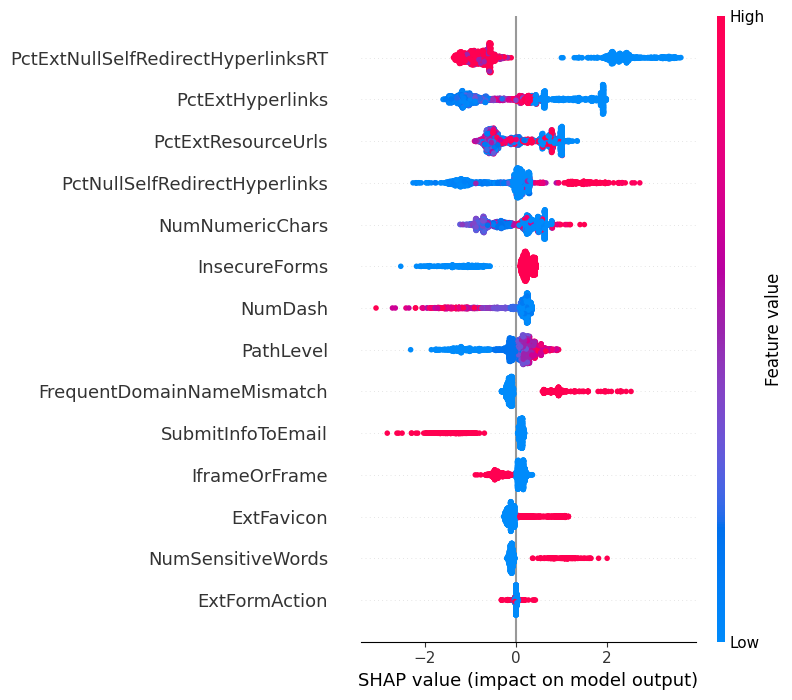

In [44]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_selected)

shap.summary_plot(shap_values, X_test_selected)
